In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import RandomizedSearchCV 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
df= pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
X=df.drop('Class',axis=1)
y=df['Class']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

amount_column = ['Amount']
pca_columns = [col for col in X.columns if col != 'Amount']

preprocessor = ColumnTransformer(
    transformers=[
        ('amount_scaler', StandardScaler(), amount_column),
        ('pca_passthrough', 'passthrough', pca_columns)
    ]
)


In [7]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier


In [8]:
pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(sampling_strategy=0.05, random_state=42)),
    ('mlp', MLPClassifier(
        activation='relu',
        solver='adam',
        early_stopping=True,
        random_state=42
    ))
])


In [9]:
param_dist = {
    'mlp__hidden_layer_sizes': [
        (64, 32),
        (128, 64),
        (128, 64, 32),
        (256, 128, 64)
    ],
    'mlp__alpha': [1e-5, 1e-4, 1e-3, 1e-2],
    'mlp__learning_rate_init': [1e-4, 3e-4, 1e-3, 3e-3, 1e-2],
    'mlp__batch_size': [256, 512, 1024],
    'mlp__max_iter': [200, 300, 500]
}


In [12]:
search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=20,
    scoring='average_precision',  # PR-AUC
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)


In [13]:
search.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\MatenTech\AppData\Local\anaconda3\envs\bd\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\MatenTech\AppData\Local\anaconda3\envs\bd\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\MatenTech\AppData\Local\anaconda3\envs\bd\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\MatenTech\AppData\Local\anaconda3\envs\bd\Lib\subprocess.py", line 548, in run
    wi

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'mlp__alpha': [1e-05, 0.0001, ...], 'mlp__batch_size': [256, 512, ...], 'mlp__hidden_layer_sizes': [(64, ...), (128, ...), ...], 'mlp__learning_rate_init': [0.0001, 0.0003, ...], ...}"
,n_iter,20
,scoring,'average_precision'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


## STEP 6 — Fit ONLY on training data

In [14]:
best_model = search.best_estimator_
print("Best parameters:", search.best_params_)


Best parameters: {'mlp__max_iter': 500, 'mlp__learning_rate_init': 0.0003, 'mlp__hidden_layer_sizes': (256, 128, 64), 'mlp__batch_size': 512, 'mlp__alpha': 0.0001}


In [15]:
y_proba = best_model.predict_proba(X_test)[:, 1]


### STEP 8 — Precision–Recall curve

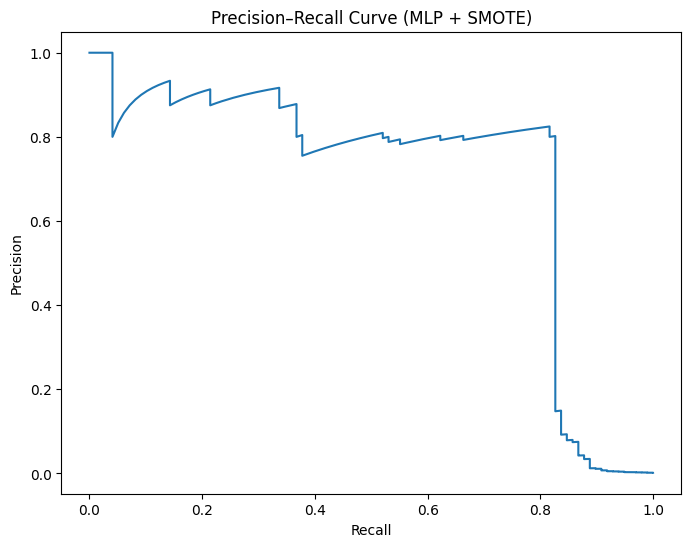

In [16]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (MLP + SMOTE)")
plt.show()


In [17]:
idx_candidates = np.where(recall[:-1] >= 0.8)[0]

optimal_threshold = (
    thresholds[idx_candidates[-1]]
    if len(idx_candidates) > 0
    else 0.001
)

print("Optimal threshold:", optimal_threshold)


Optimal threshold: 0.6588342081613455


In [19]:
y_pred_opt = (y_proba >= optimal_threshold).astype(int)


### STEP 9 — Custom threshold (Recall ≥ 0.8)

In [20]:
print(classification_report(y_test, y_pred_opt, zero_division=0))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.81      0.81        98

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



### STEP 10 — Final evaluation

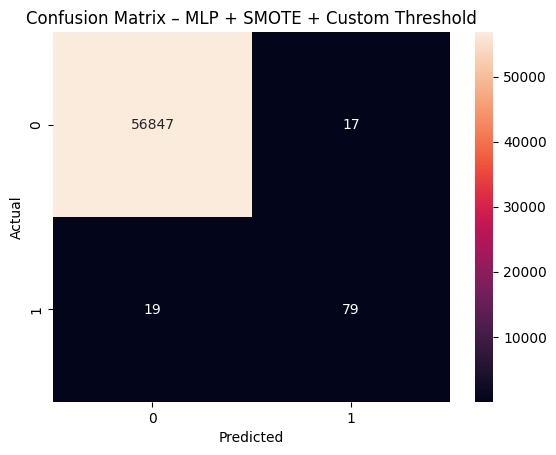

In [21]:
cm = confusion_matrix(y_test, y_pred_opt)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – MLP + SMOTE + Custom Threshold")
plt.show()


### STEP 11 — SAVE everything (ONE file)

In [22]:
import joblib

In [23]:
joblib.dump(
    {
        "model": best_model,
        "threshold": optimal_threshold
    },
    "fraud_mlp_pipeline.joblib"
)


['fraud_mlp_pipeline.joblib']

###  STEP 12 — Load & use in Dash / production

In [27]:
import pandas as pd
import joblib

# Load the saved pipeline
artifact = joblib.load("fraud_mlp_pipeline.joblib")
model = artifact["model"]
threshold = artifact["threshold"]

# Create a single new transaction with all required features
new_transaction_df = pd.DataFrame([{
    'Time': 10000,
    'V1': 0.12,
    'V2': -0.34,
    'V3': 0.56,
    'V4': 0.10,
    'V5': -0.05,
    'V6': 0.07,
    'V7': -0.01,
    'V8': 0.20,
    'V9': -0.15,
    'V10': 0.03,
    'V11': 0.11,
    'V12': -0.07,
    'V13': 0.08,
    'V14': -0.02,
    'V15': 0.01,
    'V16': 0.05,
    'V17': -0.03,
    'V18': 0.06,
    'V19': -0.04,
    'V20': 0.09,
    'V21': -0.01,
    'V22': 0.02,
    'V23': -0.02,
    'V24': 0.01,
    'V25': -0.01,
    'V26': 0.00,
    'V27': 0.02,
    'V28': -0.03,
    'Amount': 100.0
}])

# Predict probability and label
proba = model.predict_proba(new_transaction_df)[:, 1]
prediction = (proba >= threshold).astype(int)

print("Fraud probability:", proba)
print("Prediction (1=Fraud, 0=Normal):", prediction)


Fraud probability: [0.10920849]
Prediction (1=Fraud, 0=Normal): [0]
